In [27]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_columns=999
pd.options.display.max_rows=999

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px

from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

### Load & display data
We'll load the stored product embedding stored in .csv format. The embedding dimension is 500.

In [16]:
# !wget -O product_embedding_collab.zip https://www.dropbox.com/s/20u7kt34v76n3s8/product_embedding_collab.csv.zip?dl=1
# !wget -O product_tsne_embedding_collab.zip https://www.dropbox.com/s/n2qb6rvsdyuledg/product_tsne_embedding_collab.csv.zip?dl=1
# !unzip product_embedding_collab.zip
# !unzip product_tsne_embedding_collab.zip

In [17]:
# load product embedding from csv file
prod_emb_df = pd.read_csv('product_embedding_collab.csv')
prod_emb_df.head()

,name_th,category_en,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,สิงห์น้ำดื่ม 1.5ลิตร แพค 6,Beverages,0.003368,-0.006034,-0.003315,-0.000706,0.001172,0.003542,0.001113,-0.000719,-0.004665,-0.001923,0.002634,-0.003781,-0.003056,-0.004374,0.003376,-0.000028,-0.002206,0.003239,-0.003257,-0.004125,0.017181,-0.000726,0.002203,-0.000291,-0.004060,-0.003832,-0.001286,0.001598,-0.002179,0.002627,0.002309,-0.000608,-0.001968,0.001152,0.125841,0.002901,0.002100,0.003111,0.108815,0.003961,-0.005797,0.000823,0.001877,0.002712,-0.002190,0.003074,0.000958,-0.003034,-0.000214,0.000935,-0.002816,0.004167,0.004699,-0.001389,0.000943,0.004723,0.003140,-0.000422,0.001866,-0.000386,0.001508,0.001804,0.001912,0.004992,0.000840,-0.003823,-0.002423,0.001196,-0.000771,-0.001364,0.002991,-0.000455,0.007447,-0.002200,0.000890,0.001753,0.001748,-0.003601,0.002756,-0.003629,0.002142,0.003618,-0.000324,0.004709,0.001625,0.001645,0.090551,0.000353,-0.003044,-0.001661,0.001366,0.000120,-0.002391,0.002148,0.001069,0.003546,-0.001508,-0.003187,0.000457,-0.005589,0.003894,-0.000934,-0.002260,-0.006405,-0.000405,0.001594,0.000317,-0.000536,0.001663,-0.039408,-0.006515,0.001055,0.001877,0.211881,0.002109,-0.000565,0.001378,0.002697,-0.001925,0.001053,0.001390,0.000924,-0.004381,-0.003864,-0.000186,-0.001879,0.001148,0.003011,-0.002909,-0.000351,0.002360,0.004855,-0.003214,0.000857,-0.002307,-0.001307,-0.005506,0.005177,-0.001344,0.005707,-0.004410,0.000152,0.000229,0.260204,-0.000064,0.002649,0.001521,-0.004484,0.000073,-0.001675,-0.002942,-0.004748,0.000484,0.003289,-0.003012,-0.001111,0.003105,-0.038050,-0.006088,-0.004261,0.002108,-0.001430,0.000590,-0.002235,-0.000518,0.000400,0.001892,0.000861,-0.001881,0.000587,-0.002852,0.006346,-0.002239,-0.002767,-0.000974,0.001063,0.003712,0.001835,-0.000215,0.117224,-0.002900,0.003849,0.004509,-0.004336,0.002256,0.004794,0.004466,0.000224,0.571736,-0.000912,0.005127,0.000518,0.001787,0.001541,0.001078,0.001113,0.001389,0.001258,0.000577,0.004991,0.002386,-0.003193,2.965518e-03,0.001668,0.001403,0.002904,-0.004434,-0.004162,-0.071806,0.003539,0.003012,-0.005284,-0.002027,0.002132,-0.001951,0.002398,-0.00769

In [18]:
prod_emb_df.category_en.value_counts()

Health & Beauty Care                    1857
Pantry & Ingredients                    1850
Household & Pet                         1475
Snacks & Desserts                       1389
Beverages                               1128
Fresh Food & Bakery                      761
Fruit & Vegetables                       632
Meat & Seafood                           396
Mom & Kids                               376
Beer,Wine & Spirits                      122
Merit & Giftset                           22
Chinese New Year Products                  2
Ghost Festival Products                    2
International Products                     1
Shop by Brands                             1
Season's Greetings                         1
Promotion Crazy Price 11.11 Round4pm       1
Name: category_en, dtype: int64

### Product embedding visualisation by product categories
Next we'll visualise the dimension-reduced/compressed version of product embedding using TSNE to see how product embeddings of diffrent categories lie in latent space

In [19]:
cats = ['Fruit & Vegetables','Meat & Seafood','Fresh Food & Bakery','Pantry & Ingredients','Snacks & Desserts',
       'Beverages','Beer,Wine & Spirits','Health & Beauty Care','Household & Pet','Mom & Kids']
sku_per_cat = 100
samp_dfs = []
for cat in cats: samp_dfs.append(prod_emb_df[prod_emb_df.category_en==cat].sample(sku_per_cat))
samp_df = pd.concat(samp_dfs,0)
del samp_dfs

In [20]:
# 2d visualisation
tsne = TSNE(n_components=2)

tsne_decom = tsne.fit_transform(samp_df.values[:,2:])

In [21]:
tsne_df = pd.DataFrame(data=tsne_decom)
tsne_df['name_th'] = samp_df['name_th'].values
tsne_df['category_en'] = samp_df['category_en'].values

fig = px.scatter(tsne_df, x=0, y=1,color='category_en', hover_data=['name_th'],width=800,
                   height=800,opacity=0.5)
fig.show()

### Product embedding query and arithmetic
We could query similar products using product embedding for similar product recommendation. At the same time, product embeddings could be combined through arithmetic operations(+/-/*)

In [22]:
# # pre-decompose sku embedding
# tsne = TSNE()
# tsne_decom = tsne.fit_transform(prod_emb_df.values[:,2:])

# tsne_df = pd.DataFrame(data=tsne_decom)
# tsne_df['sku_name'] = prod_emb_df['name_th'].values
# tsne_df['cat'] = prod_emb_df['category_en'].values
# tsne_df.to_csv('tmp/product_tsne_embedding_collab.csv',index=False)

In [23]:
tsne_df = pd.read_csv('product_tsne_embedding_collab.csv')
tsne_df.head()

,0,1,sku_name,cat
0,44.115864,68.749830,สิงห์น้ำดื่ม 1.5ลิตร แพค 6,Beverages
1,43.686840,69.260890,เพียวไลฟ์น้ำดื่ม 1.5ลิตร แพค 6,Beverages
2,44.016580,68.708100,สิงห์น้ำดื่ม 600ซีซี แพค 12,Beverages
3,43.503864,69.108826,เพียวไลฟ์น้ำดื่ม 600ซีซี แพค 12,Beverages
4,43.486626,67.644890,คิเรอิโฟมล้างมือ200มล. รีฟิล,Health & Beauty Care


In [24]:
def plot_with_labels(low_dim_embs, labels, filename=None, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    if filename: plt.savefig(filename)

Load product embedding to Gensim's KeyedVectors

In [29]:
# replace space to underscore -> for avoiding some format conversion error
prod_emb_df['name_th'] = prod_emb_df['name_th'].map(lambda x:x.replace(' ','_'))
tsne_df['sku_name'] = tsne_df['sku_name'].map(lambda x:x.replace(' ','_'))

os.makedirs('tmp',exist_ok=True)
# save product embedding as .txt format
prod_emb_df.drop('category_en',axis=1).to_csv('tmp/product_embedding_collab.txt',sep=' ',index=False, header=False)

# convert from glove format (currently saved .txt file to word2vec format)
_ = glove2word2vec('tmp/product_embedding_collab.txt', 'tmp/product_embedding_collab_gensim.txt')

model = KeyedVectors.load_word2vec_format('tmp/product_embedding_collab_gensim.txt')

Create function fro querying full product name by text

In [326]:
# helper function for product full name query
def get_product_full_name(query, df, col):
    return df[df[col].map(lambda x:query in x)][col].values

In [327]:
get_product_full_name('โซดา',prod_emb_df,'name_th')

array(['สิงห์โซดาเครื่องดื่ม_325มล._แพค_6',
       'สิงห์โซดาขวดเล็ก_325ซีซี_แพค_24', 'ชเวปส์มะนาวโซดา_330มล._แพค_6',
       'แมกกาแรตโซดาผง_300กรัม', 'เฮลซ์บลูบอยครีมโซดา_710ซีซี',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์100กรัม',
       'เซ็นโซดายน์ยาสีฟันมัลติแคร์_160กรัม',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์ไวท์เทนนิ่ง_100กรัม',
       'เซ็นโซดายน์ยาสีฟันรีแพร์แอนด์โพรเทคท์เอ็กซ์ตร้าเฟรช_100กรัม',
       'แม๊กกาแรตเบคกิ้งโซดา_1กก.',
       'คาลพิสแลคโตะโซดาเครื่องดื่มอัดลมรสนมเปรี้ยว_245มล.',
       'เซ็นโซดายน์ยาสีฟันแรพพิดแอคชั่น_100กรัม', 'ชเวปส์น้ำโซดา_330ซีซี',
       'ร็อคเมาเท็นเครื่องดื่มโซดา_325มล._แพค_6',
       'สปาร์คเคิลไวท์ยาสีฟันไวท์เลมอนโซดาหลอดบีบ_100กรัม',
       'เซ็นโซดายน์ยาสีฟันมัลติแคร์_160กรัม_แพค_2',
       'ชเวปส์มะนาวโซดา_330มล._แพค_12',
       'ร็อคเมาเท็นเครื่องดื่มโซดา_325มล._แพค_24',
       'เซ็นโซดายน์ยาสีฟันกัมแคร์_160กรัม', 'สิงห์โซดาขวดเล็ก_325ซีซี',
       'เซ็นโซดายน์ยาสีฟันไวท์เทนนิ่ง_160กรัม_แพค2',
       'ดรากอนโซดาไฟเกร็ด_150ก

Whiskey + soda => Beer

In [312]:
model.most_similar_cosmul(positive=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล._แพค_6'],
                          topn=20)

[('ไฮไทแครกเกอร์รสเค็ม_141กรัม', 0.4563044011592865),
 ('ลีโอเบียร์แคน_320ซีซี_แพค_6', 0.45551955699920654),
 ('สิงห์เบียร์ขวดใหญ่_620ซีซี_แพค_12', 0.44965454936027527),
 ('คาร์เนชั่นพลัสผลิตภัณฑ์นมข้นหวานหลอดบีบ_180กรัม', 0.44847571849823),
 ('ปรุงทิพย์เกลือป่น_120กรัม', 0.4470084309577942),
 ('ทไวนิงส์ชาเอิร์ลเกรย์_2กรัม_แพค_25', 0.446900337934494),
 ('ทิปโก้สควีซน้ำส้มวาเลนเซียพาสเจอร์ไรส์_1ลิตร', 0.4360201954841614),
 ('อิโตเอ็นชาเขียวญี่ปุ่น_2กรัม_แพค_20ซอง', 0.4347131848335266),
 ('ไฮเนเก้นเบียร์ขวด_620มล._แพค12', 0.43131160736083984),
 ('ช้างคลาสสิกเบียร์_320มล._แพค_6', 0.43001726269721985),
 ('ช้างเบียร์แคน_320ซีซี_แพค_24', 0.42953845858573914),
 ('ไฮเนเก้นเบียร์แคน_490มล._แพค_4', 0.4289063513278961),
 ('ตรามือพริกขี้หนูป่น_45กรัม', 0.4278852343559265),
 ('อิโตเอ็นโออิโอชาซาร่าซาร่า_40กรัม', 0.4274154603481293),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_6', 0.4266737997531891),
 ('ลิโก้ลูกเกด_250กรัม', 0.4263189733028412),
 ('ลินน้ำตาลทรายธรรมชาติชนิดซอง_6กรัม_แพค_50ซอง', 0.42570763826

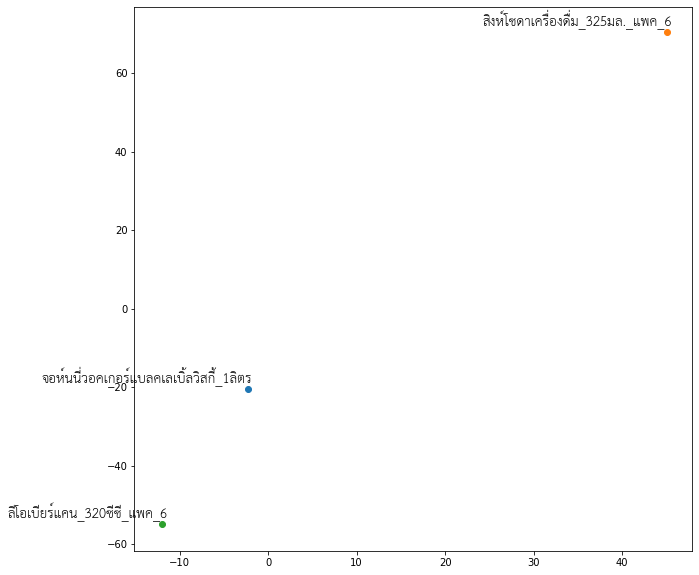

In [321]:
products=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล._แพค_6','ลีโอเบียร์แคน_320ซีซี_แพค_6']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)